In [1]:
import networkx as nx

import matplotlib.pyplot as plt
import matplotlib as mpl

import numpy as np
import pandas as pd

import re

link do ramki: https://networks.skewed.de/net/chicago_road

In [2]:
edges = pd.read_csv("edges.csv")
nodes = pd.read_csv("nodes.csv")

In [3]:
graph = nx.from_pandas_edgelist(edges, "source", "target")

In [4]:
for index, row in nodes.iterrows():
    position_string = row['_pos']
    coordinates = re.findall(r'\d+\.\d+', position_string)
    x, y = map(float, coordinates)
    nx.set_node_attributes(graph, {row["index"]: (x, -y)}, 'pos')

In [5]:
pos = nx.get_node_attributes(graph, 'pos')

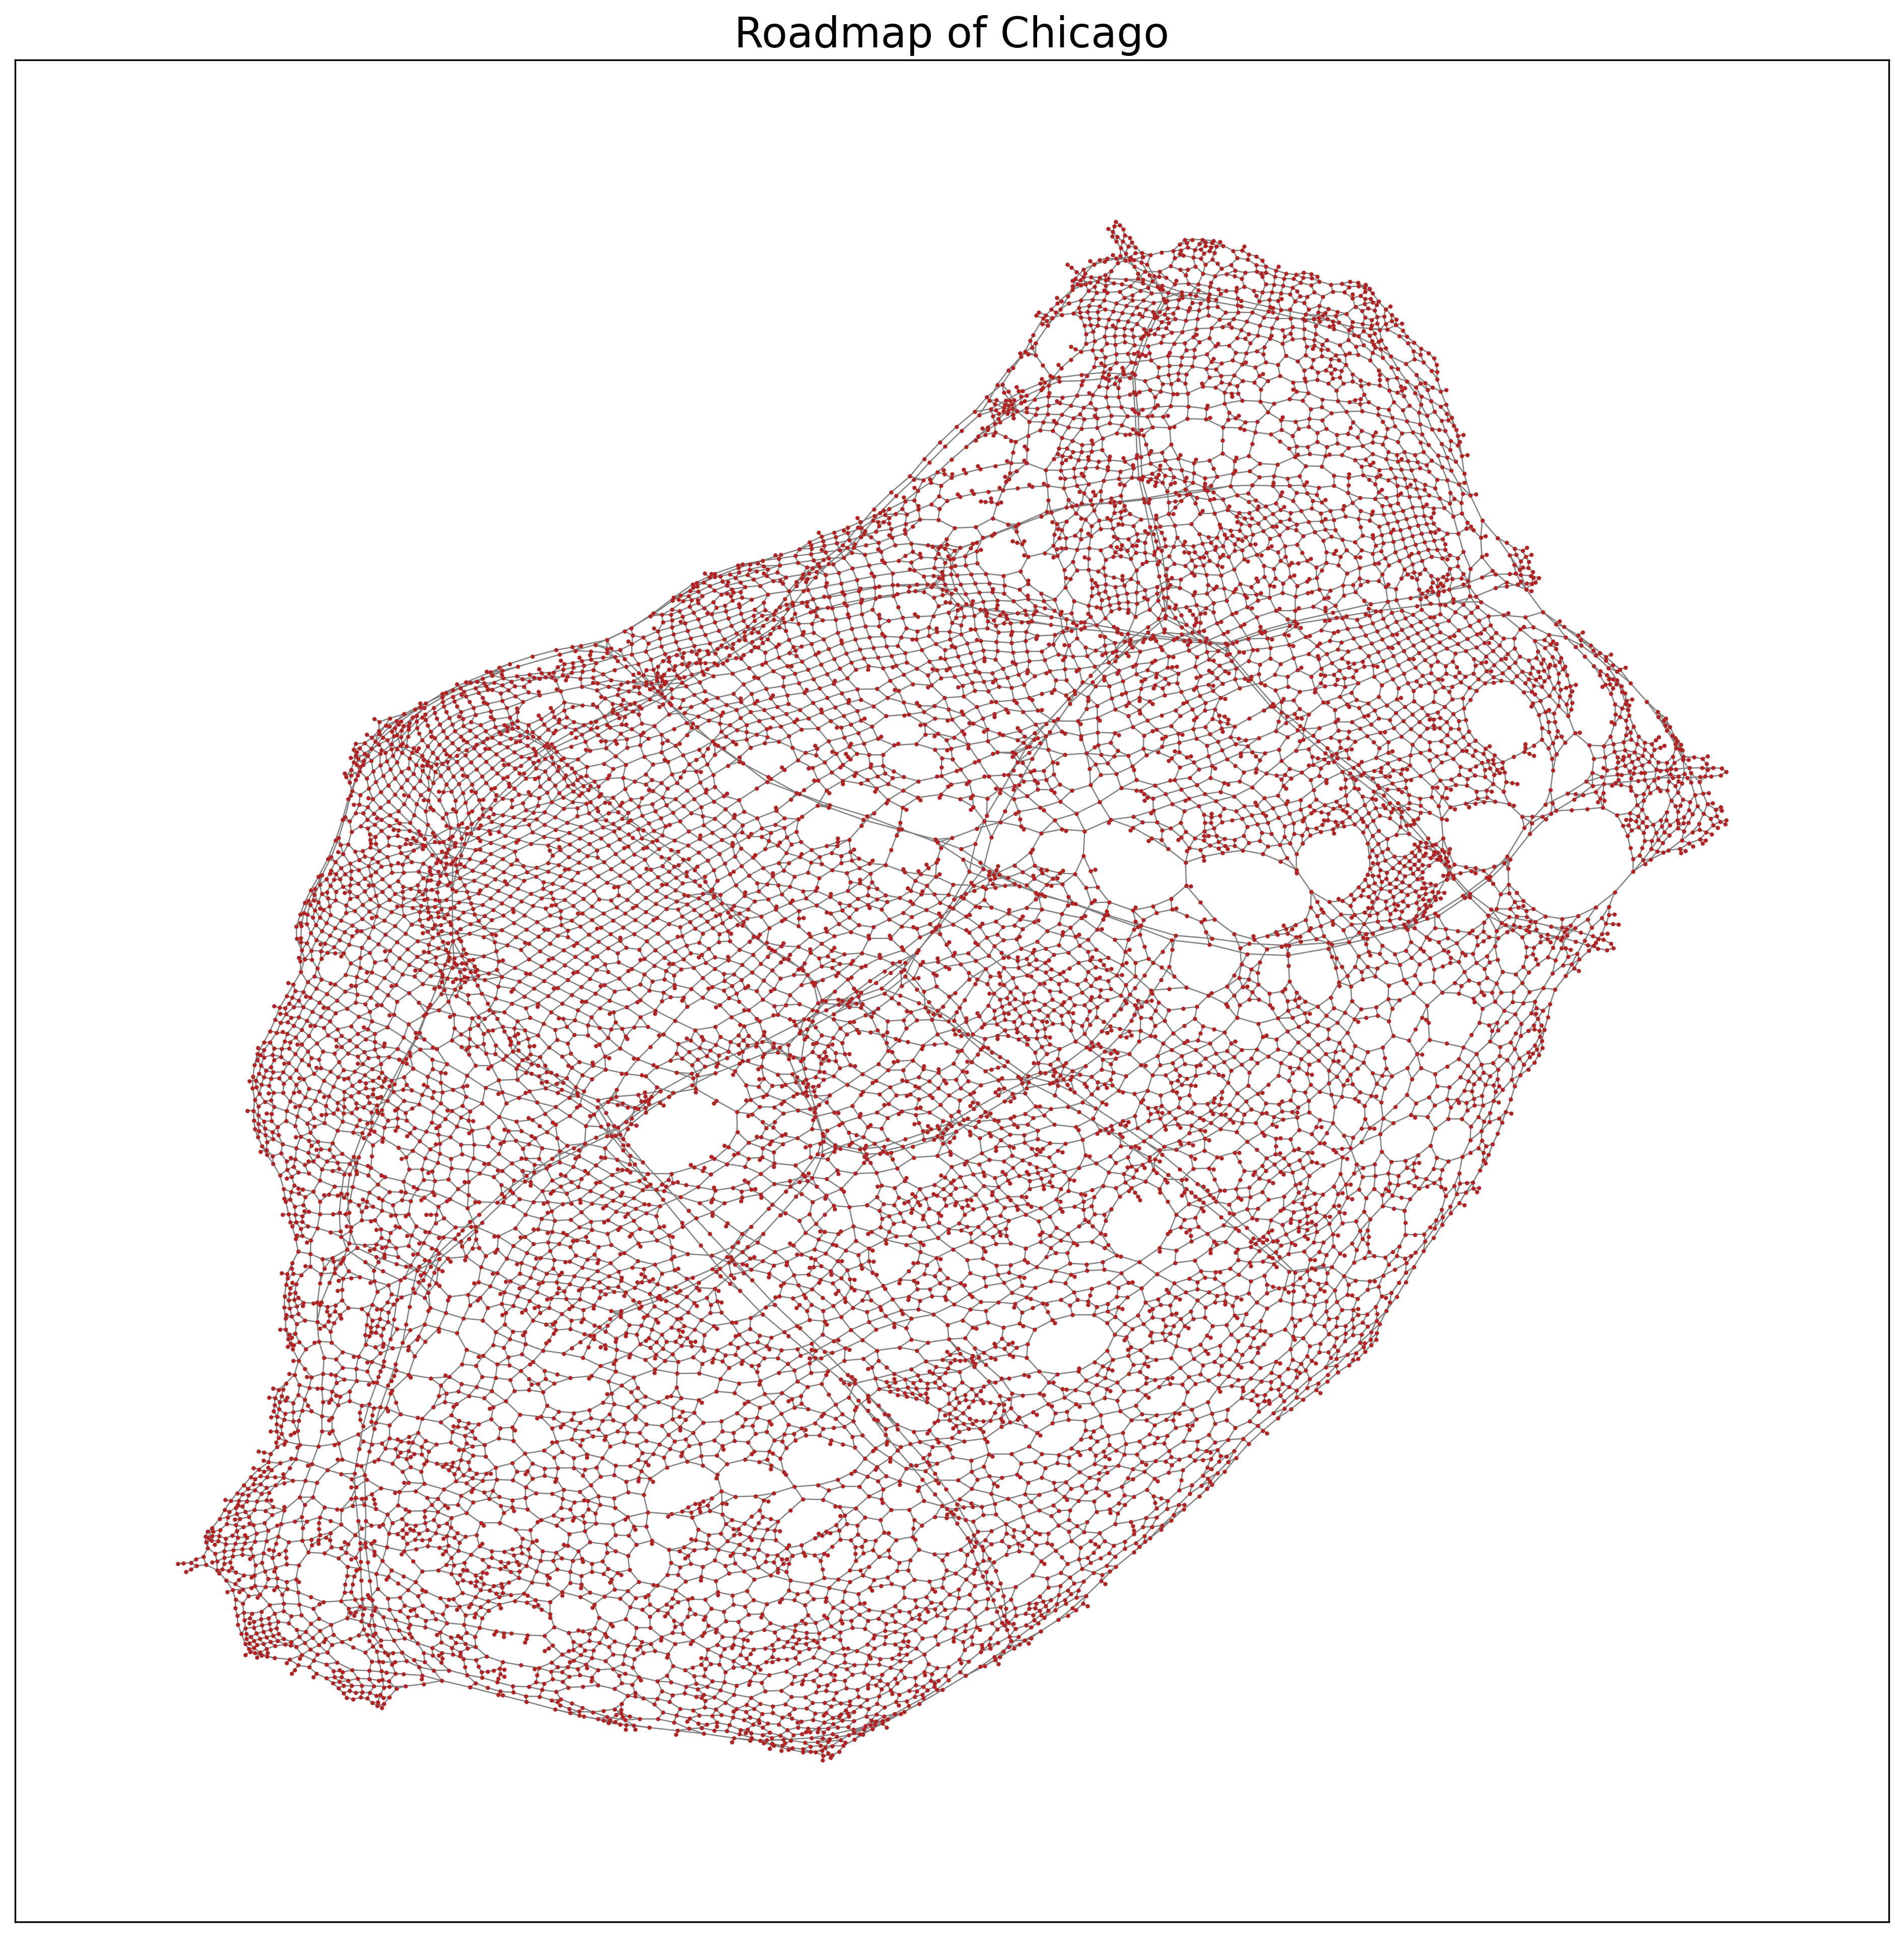

In [6]:
fig, ax = plt.subplots(1, 1, figsize= (16, 16), dpi = 300)

ax.set_title("Roadmap of Chicago", fontsize=20)

nx.draw_networkx_nodes(graph, 
    pos=pos, 
    node_size = 1,
    node_color="firebrick", 
    ax=ax
)

nx.draw_networkx_edges(
    graph,
    pos=pos,
    width=0.6,
    edge_color="gray", # półprzezroczyste krawędzie
    ax=ax,
)